In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from pgmpy.estimators import PC
from abbeyFunctions import graph_DAG
from abiFunctions import analyze_wls_pooled_models, wls_pooled_model_analysis
import pingouin

Import dataframes for plotting the full DAGs

In [2]:
diff_nominal = pd.read_csv('diff_nominal.csv')

diff_nominal.drop(columns=['Unnamed: 0'], inplace=True)

rates_nominal = pd.read_csv('rates_nominal.csv')

rates_nominal.drop(columns=['Unnamed: 0'], inplace=True)

Creating a dictionary to store the various combinations fo the dataframes for the DAGs

In [3]:
nominal_differenced_rates_with_all_variables = diff_nominal.dropna().set_index(['FIPS', 'TimePeriod'])

nominal_rates_with_all_variables = rates_nominal.dropna().set_index(['FIPS', 'TimePeriod'])

# Create a dictionary to store the DataFrames
full_DAG_dict = {}

full_DAG_dict['Nominal rates (All variables)'] = nominal_rates_with_all_variables

full_DAG_dict['Nominal rates (without Monetary)'] = nominal_rates_with_all_variables.drop(columns=['M4', 'M4I'])

full_DAG_dict['Nominal rates (without unem)'] = nominal_rates_with_all_variables.drop(columns=['unem'])

full_DAG_dict['Nominal diff rates (All variables)'] = nominal_differenced_rates_with_all_variables

full_DAG_dict['Nominal diff rates (without Monetary)'] = nominal_differenced_rates_with_all_variables.drop(columns=['M4', 'M4I'])

full_DAG_dict['Nominal diff rates (without unem)'] = nominal_differenced_rates_with_all_variables.drop(columns=['unem'])

Here we plot the DAGs

  0%|          | 0/4 [00:00<?, ?it/s]

keep control: Util
keep control: Mini
('M4', 'unem') ['Util', 'Mini']
('unem', 'M4I') []
keep control: Util
('M4I', 'M4') ['Util']
('M4I', 'Mini') []
keep control: M4
keep control: Mini
('Util', 'unem') ['M4', 'Mini']
keep control: M4I
('Util', 'M4') ['M4I']
keep control: M4
keep control: Util
('Mini', 'unem') ['M4', 'Util']


  0%|          | 0/2 [00:00<?, ?it/s]

keep control: Mini
('Util', 'unem') ['Mini']
keep control: Util
('Mini', 'unem') ['Util']


  0%|          | 0/3 [00:00<?, ?it/s]

('M4I', 'M4') []
('M4', 'Util') []
keep control: Mini
('Util', 'M4I') ['Mini']
keep control: Util
('Mini', 'M4I') ['Util']


  0%|          | 0/4 [00:00<?, ?it/s]

('M4', 'unem') []
('unem', 'Mini') []
keep control: Mini
('unem', 'M4I') ['Mini']
keep control: unem
('Mini', 'M4I') ['unem']
keep control: Util
('Agri', 'M4') ['Util']
keep control: Agri
('Util', 'M4') ['Agri']


  0%|          | 0/2 [00:00<?, ?it/s]

keep control: Mini
keep control: Agri
('Util', 'unem') ['Mini', 'Agri']
keep control: Util
keep control: Mini
('Agri', 'unem') ['Util', 'Mini']
keep control: Util
keep control: Agri
('Mini', 'unem') ['Util', 'Agri']


  0%|          | 0/3 [00:00<?, ?it/s]

keep control: Util
keep control: M4I
keep control: Mini
('Agri', 'M4') ['Util', 'M4I', 'Mini']
keep control: Util
keep control: Mini
keep control: Agri
('M4I', 'M4') ['Util', 'Mini', 'Agri']
('M4I', 'Mini') []
keep control: M4I
keep control: Mini
keep control: Agri
('Util', 'M4') ['M4I', 'Mini', 'Agri']
keep control: M4I
keep control: Util
keep control: Agri
('Mini', 'M4') ['M4I', 'Util', 'Agri']
('Mini', 'M4I') []


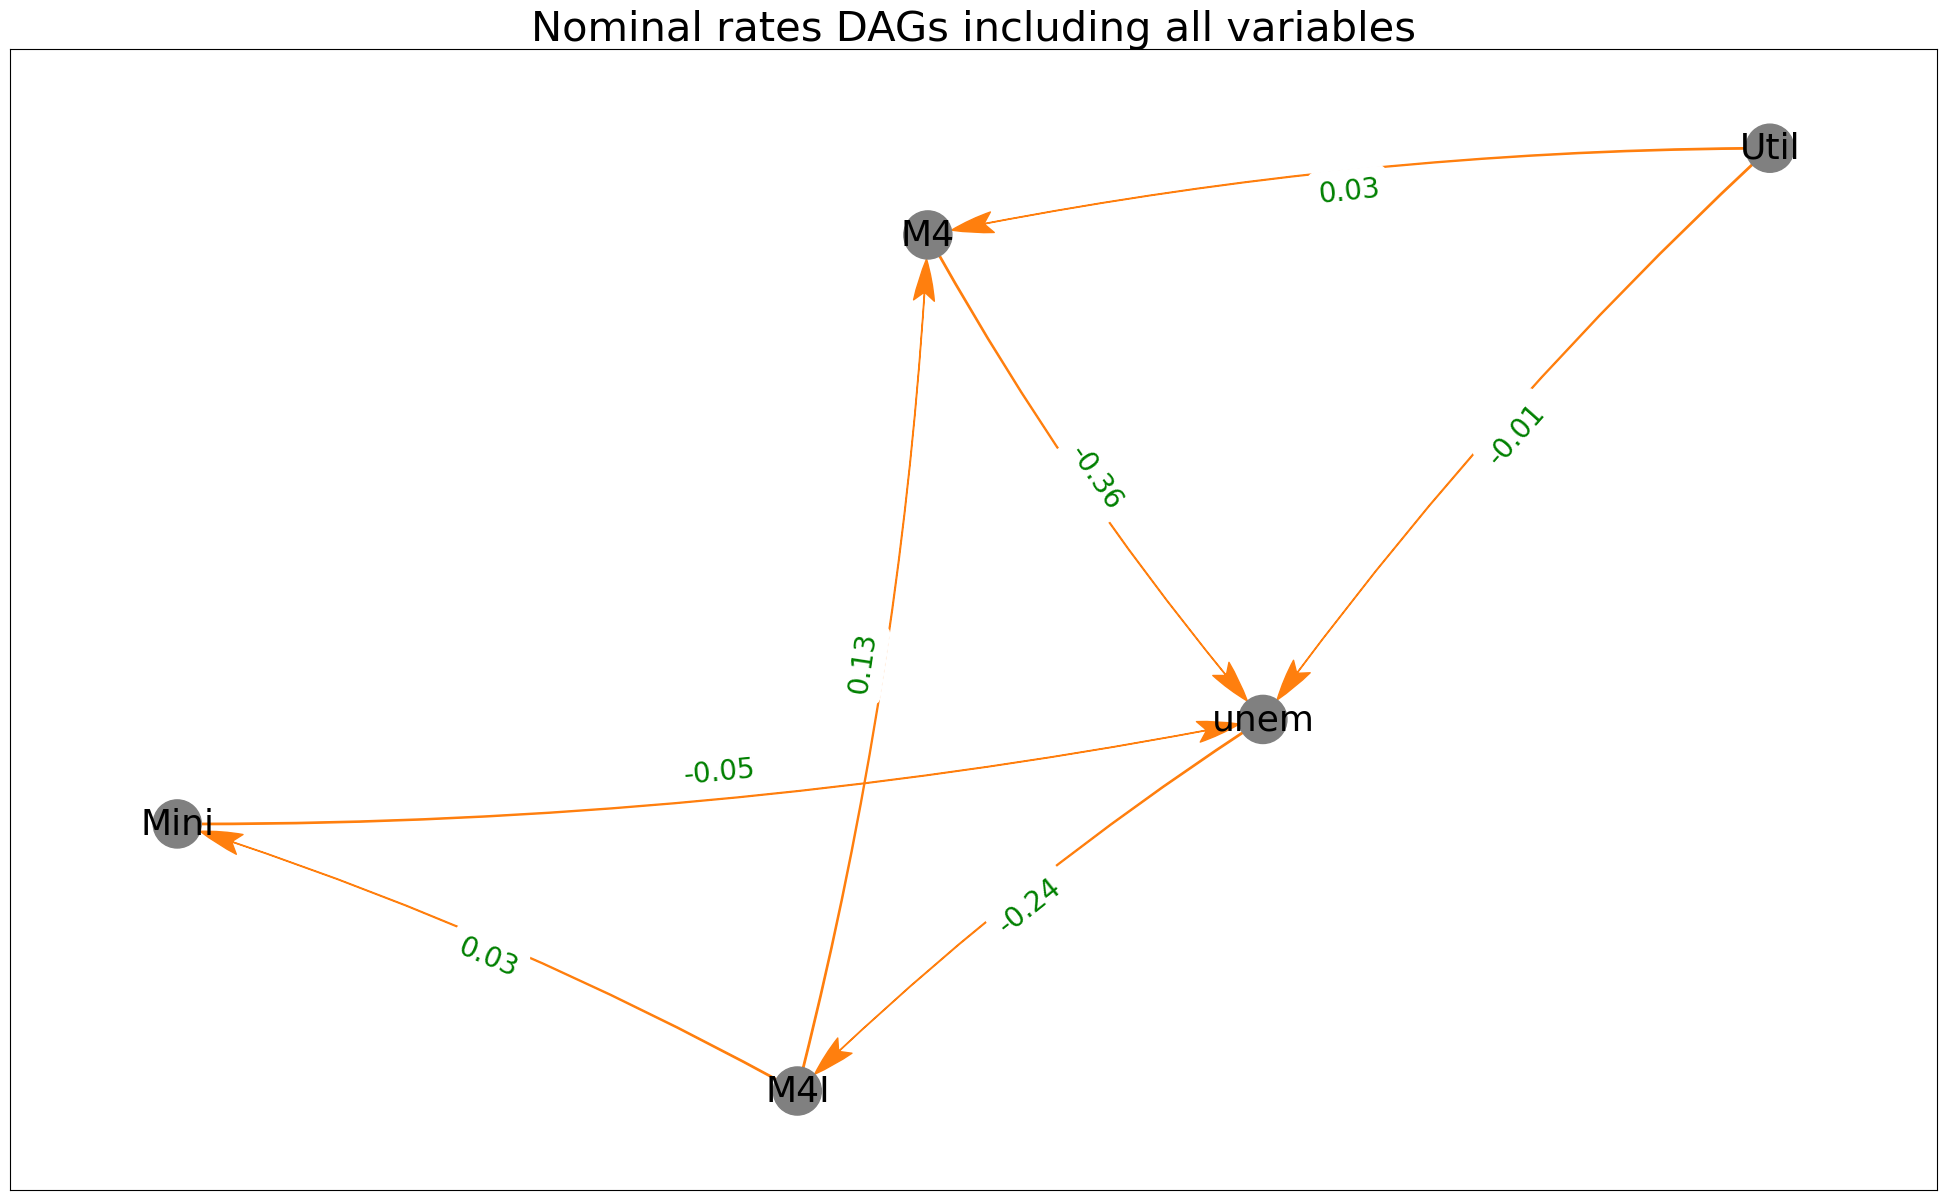

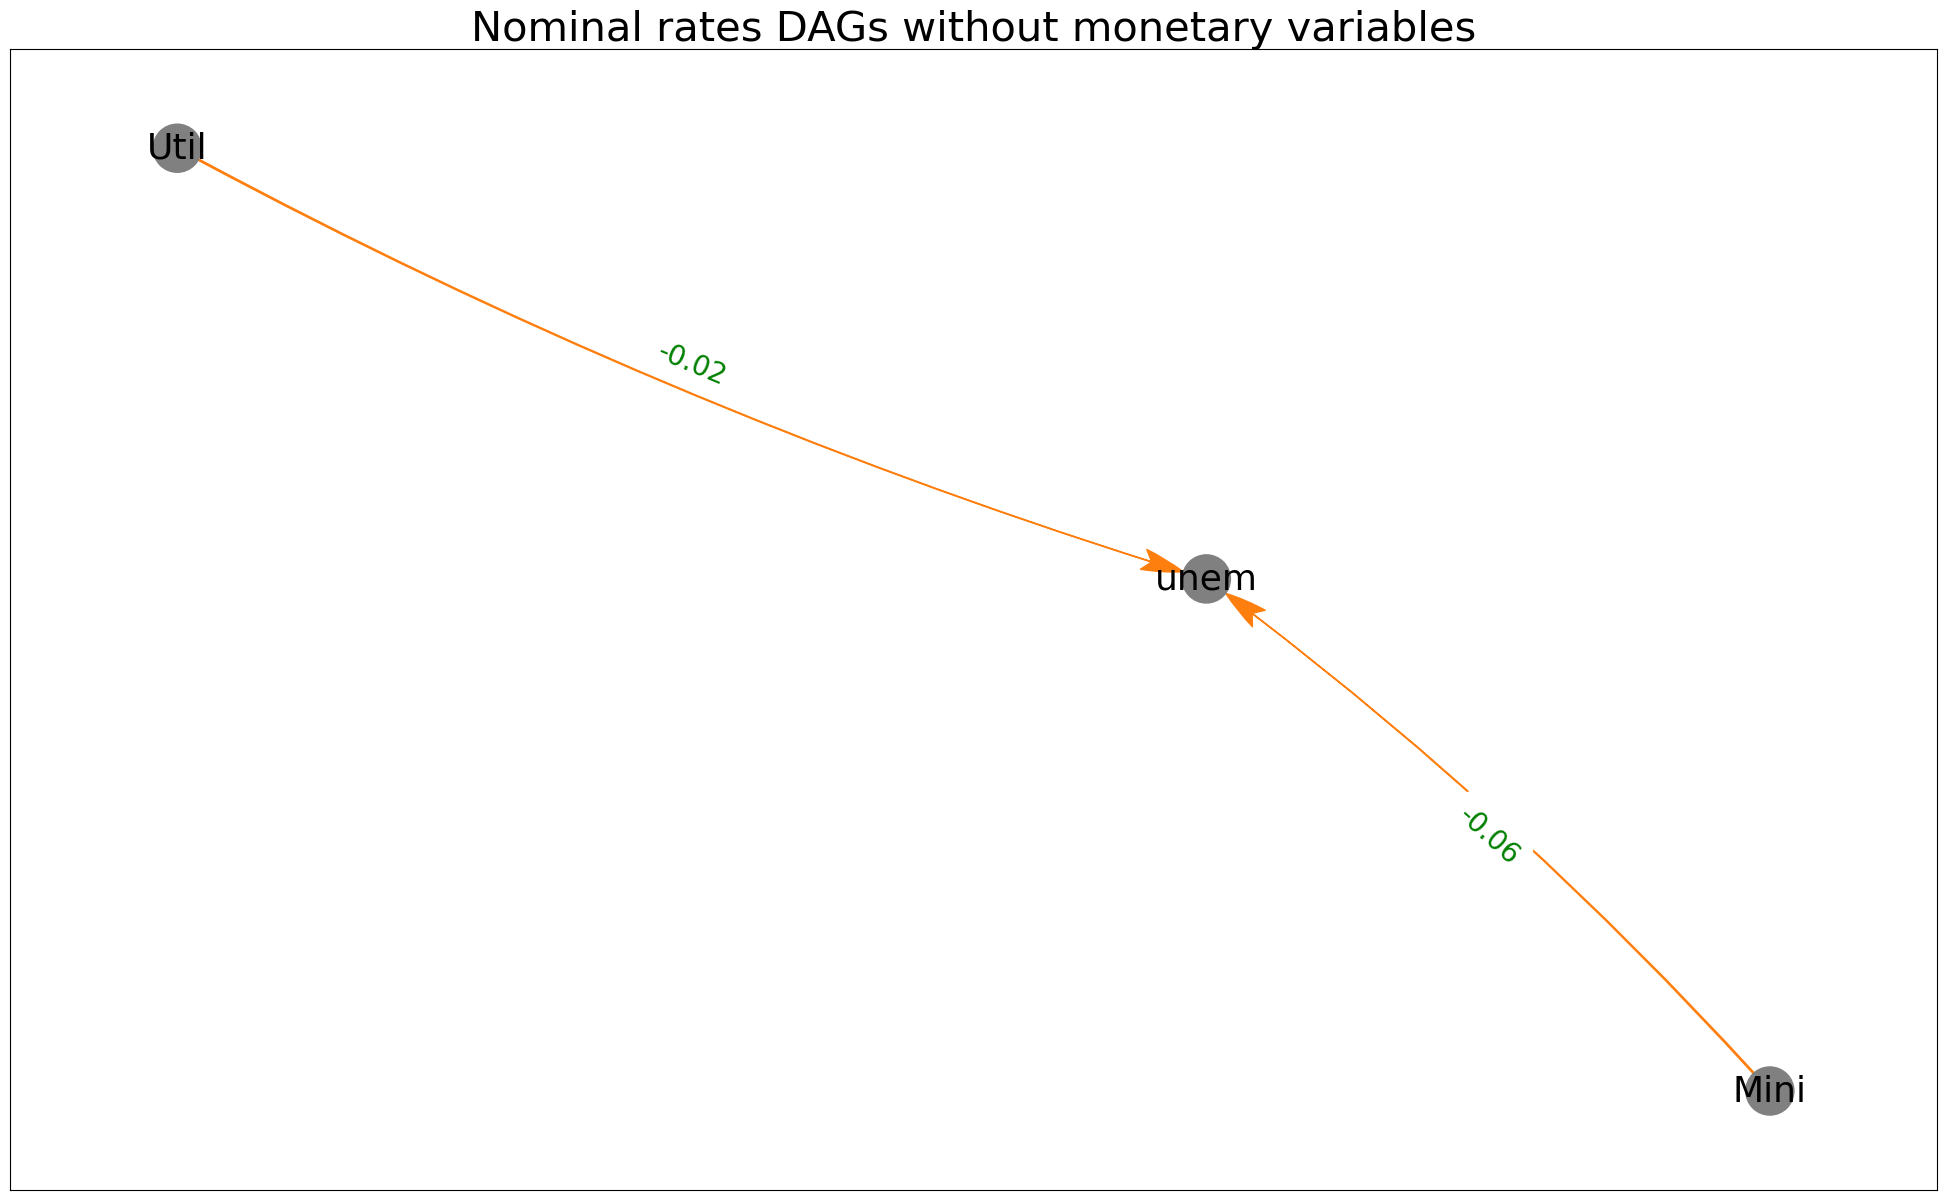

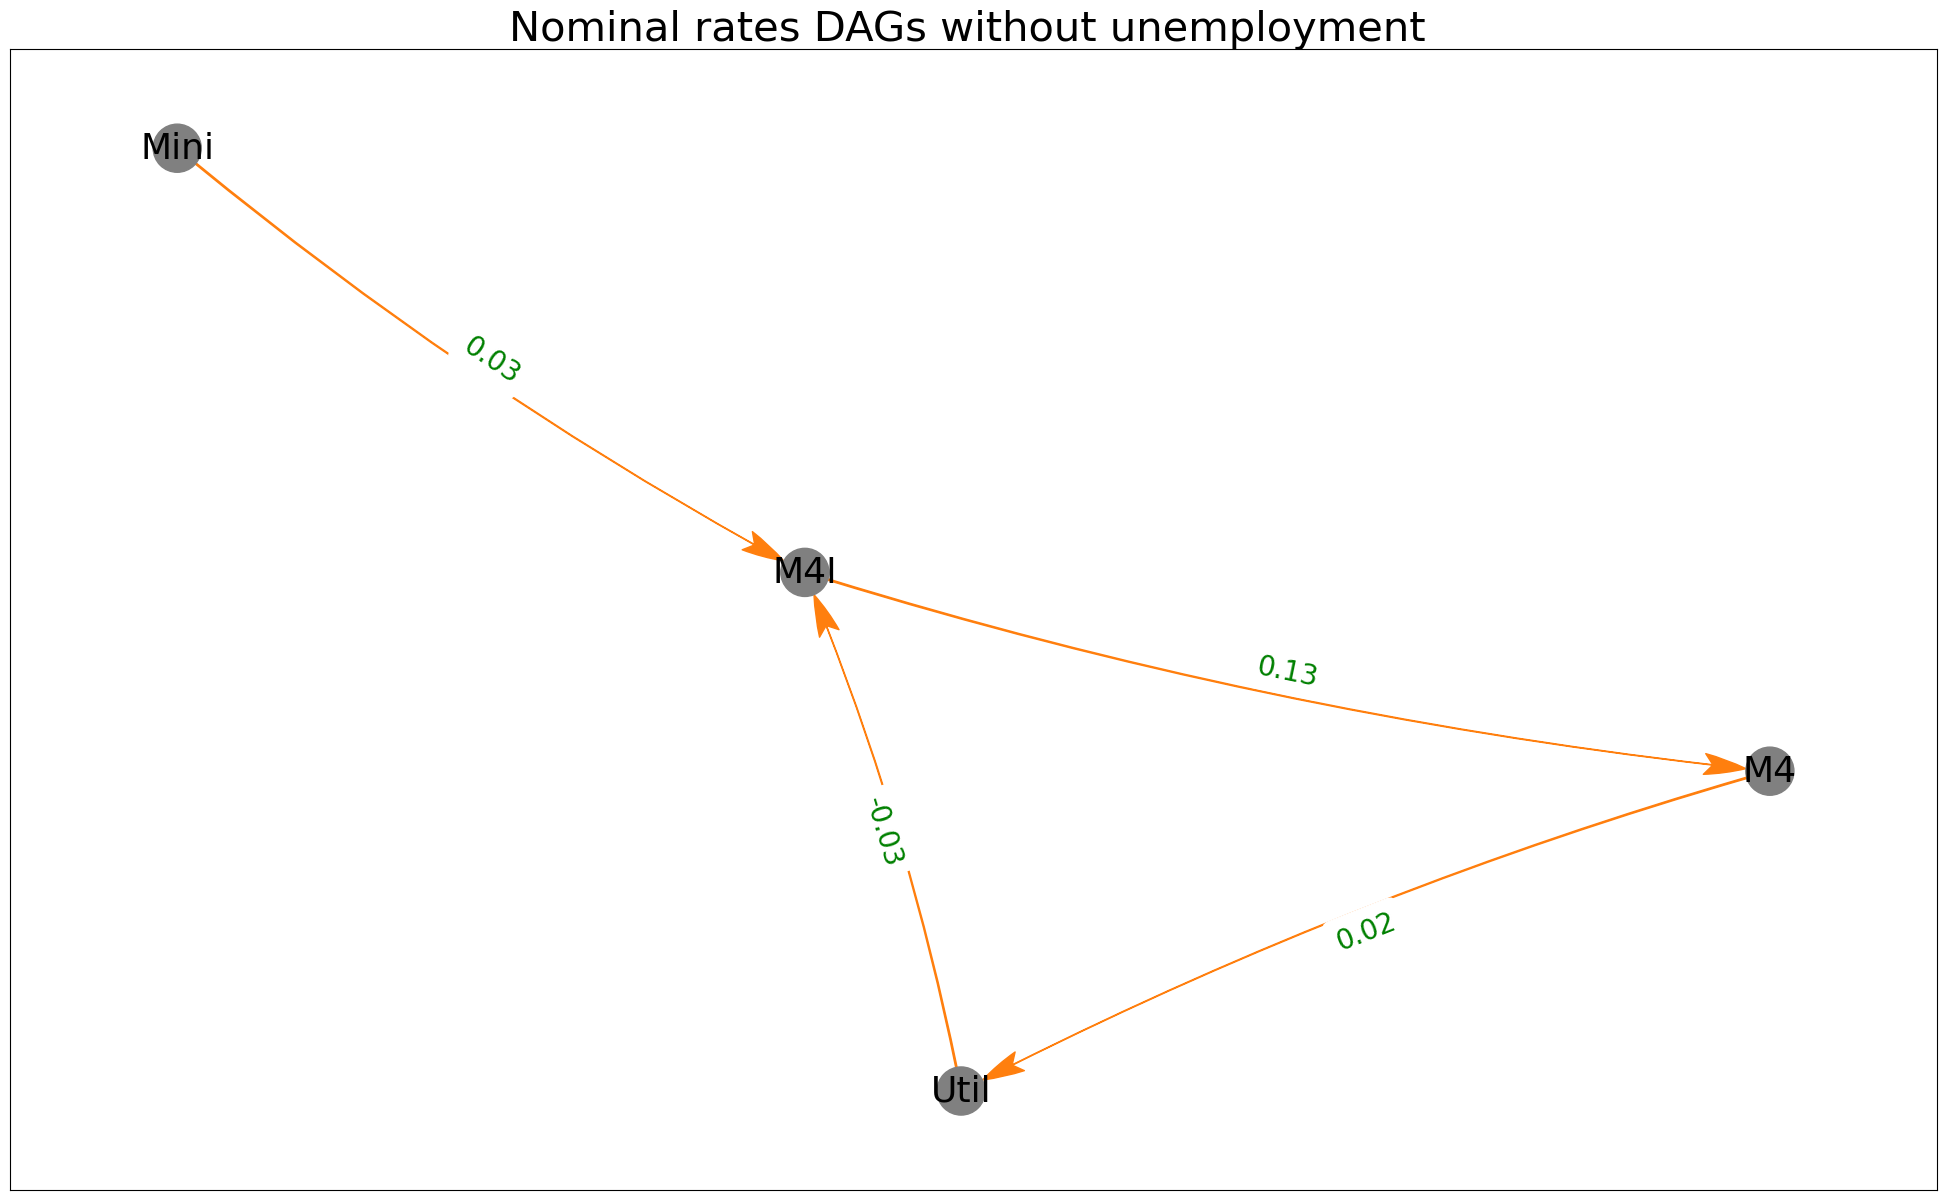

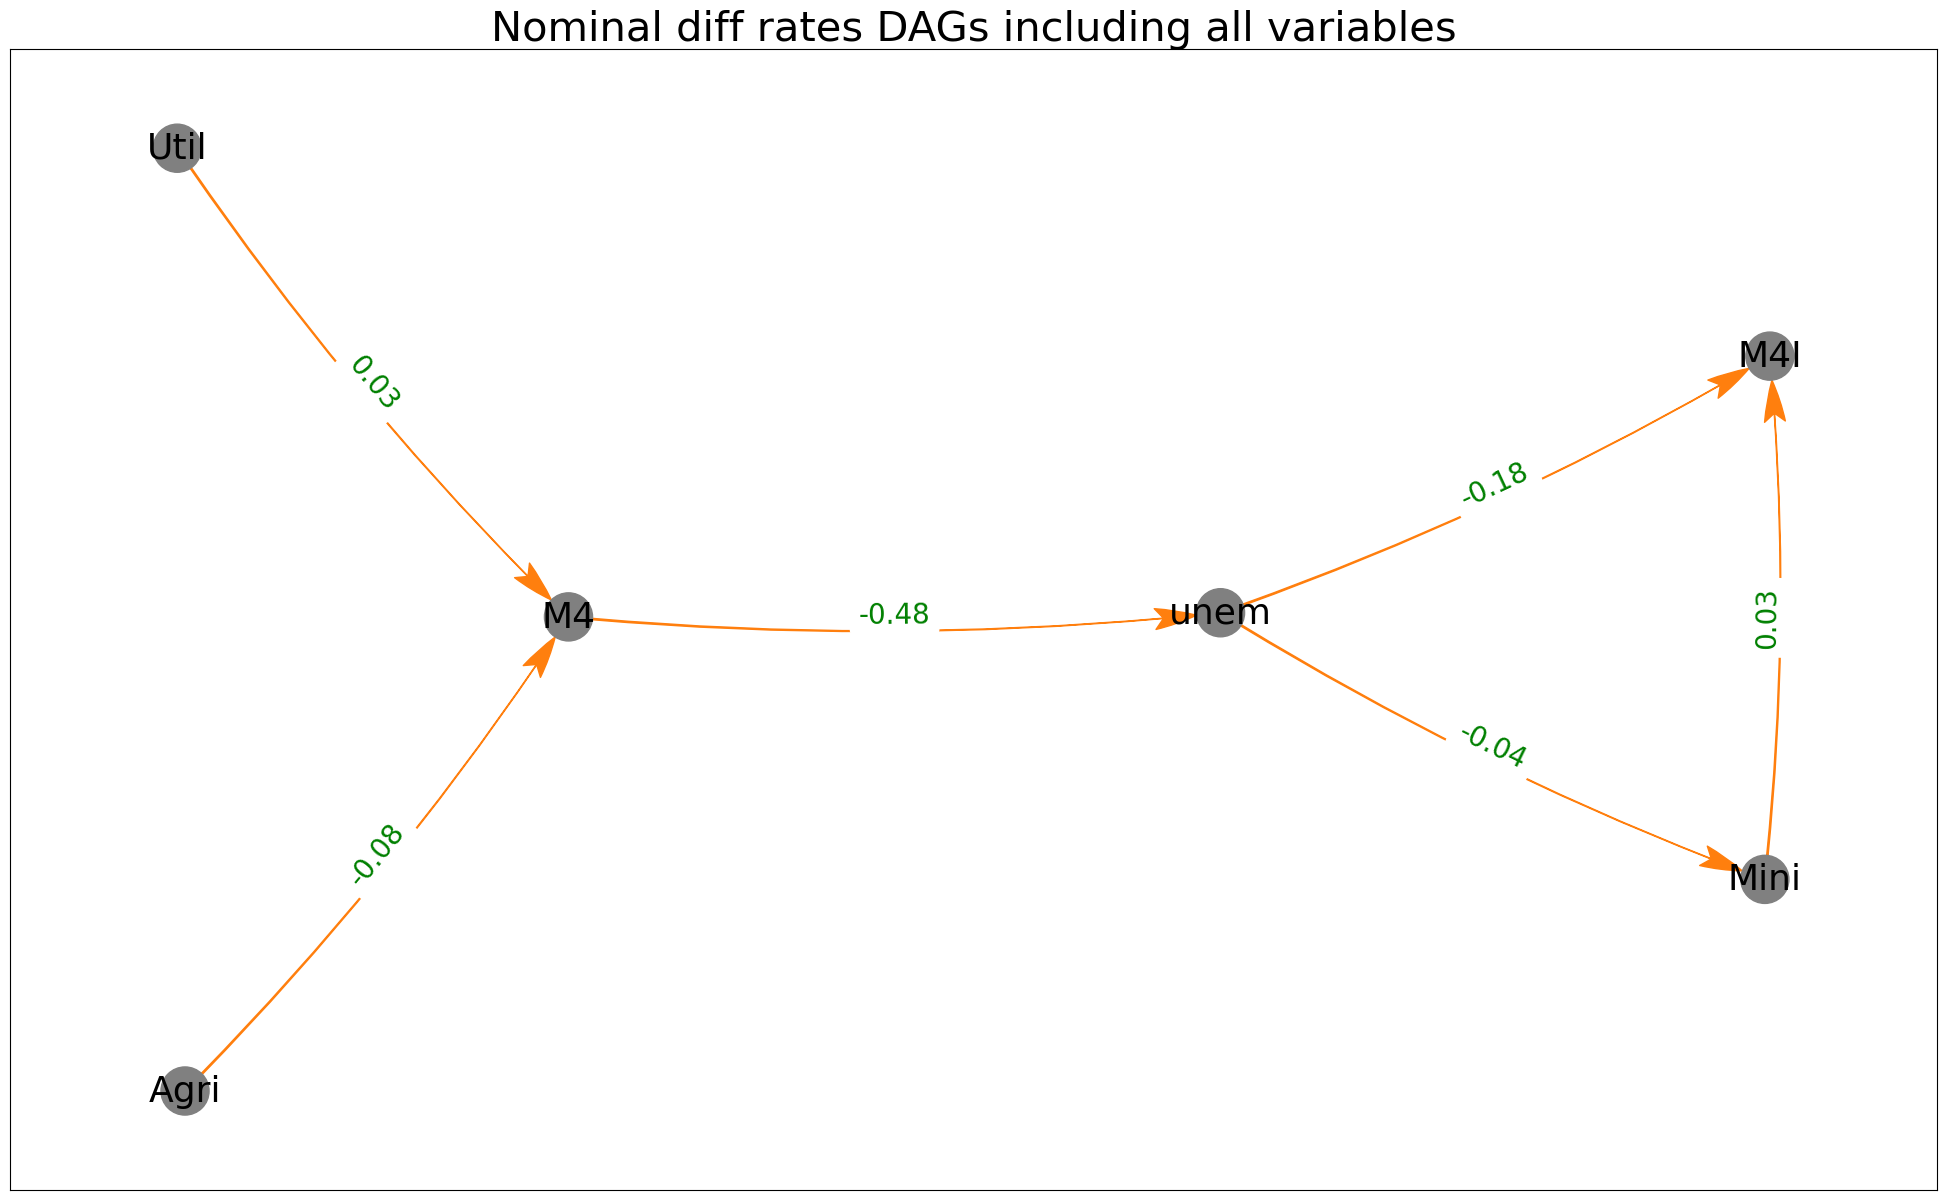

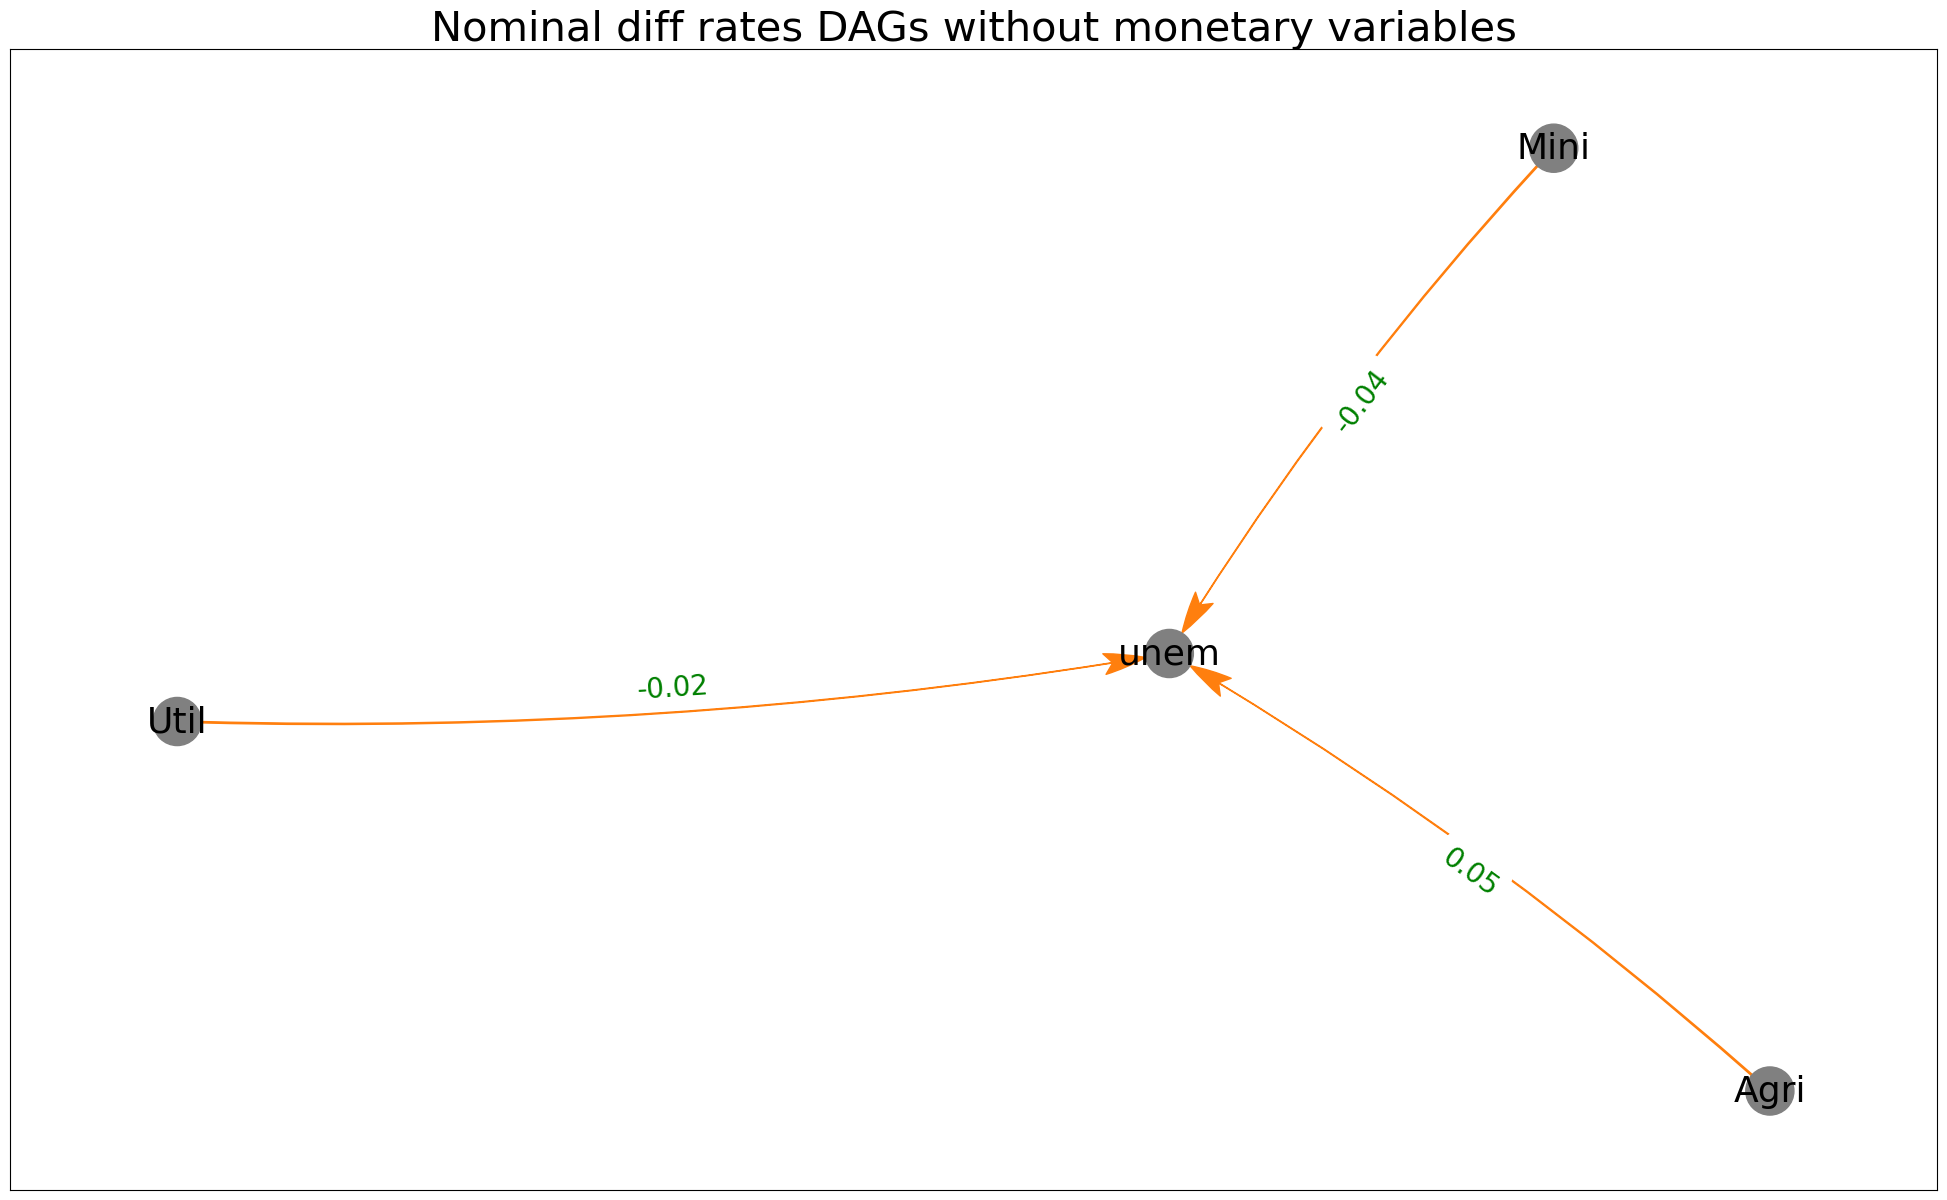

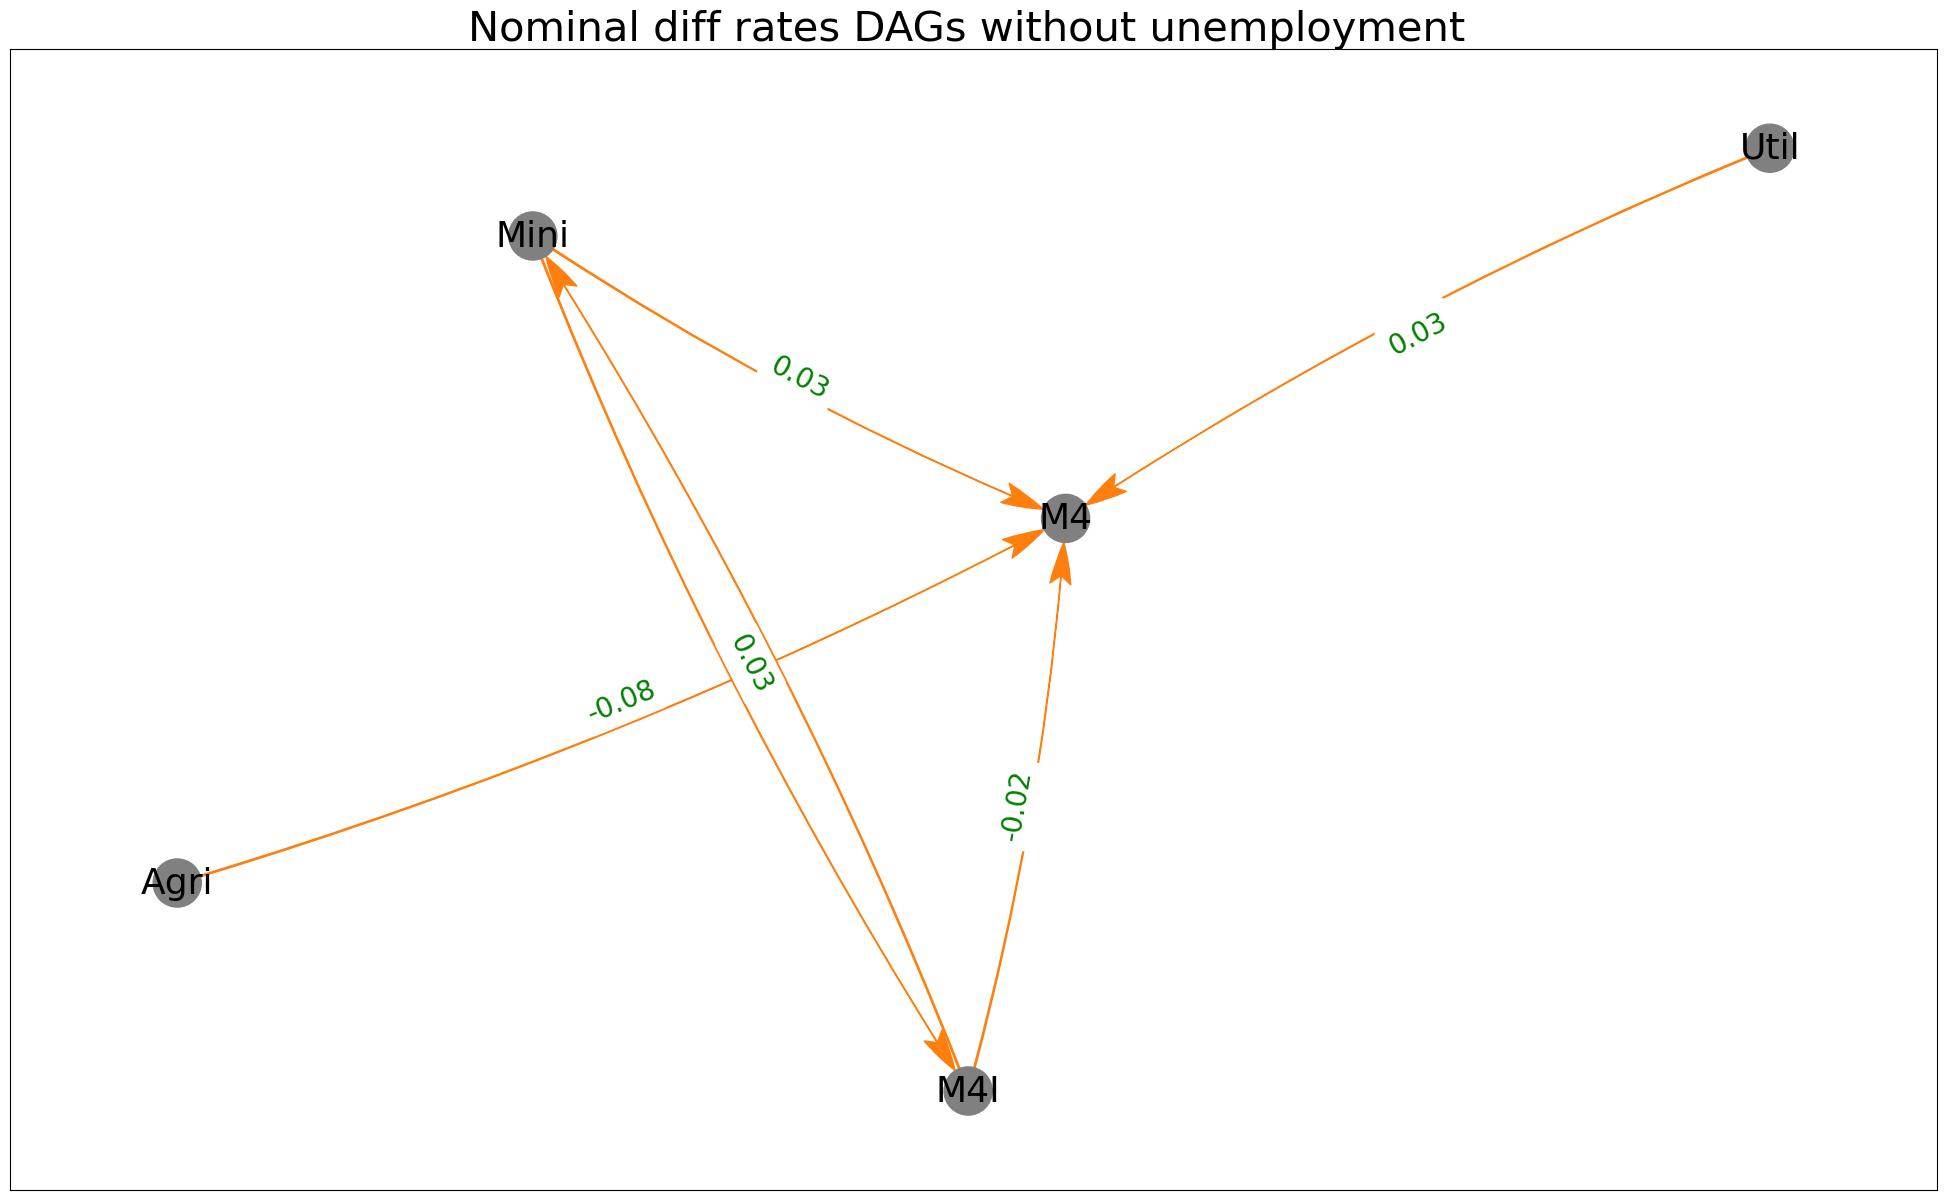

In [4]:
title = ['Nominal rates DAGs including all variables',
        'Nominal rates DAGs without monetary variables',
        'Nominal rates DAGs without unemployment ',
        'Nominal diff rates DAGs including all variables',
        'Nominal diff rates DAGs without monetary variables',
        'Nominal diff rates DAGs without unemployment ']

# Plot DAGs for each dataframe
for i, key in enumerate(['Nominal rates (All variables)',
                         'Nominal rates (without Monetary)',
                         'Nominal rates (without unem)',
                         'Nominal diff rates (All variables)',
                         'Nominal diff rates (without Monetary)',
                         'Nominal diff rates (without unem)']):
    plot_df = full_DAG_dict[key]
    c = PC(plot_df)
    max_cond_vars = len(plot_df.keys()) - 2
    model = c.estimate(return_type='pdag', variant='orig', significance_level=0.01,
                       max_cond_vars=max_cond_vars, ci_test='pearsonr')
    edges = model.edges

    # Plot the DAG
    graph_DAG(edges, plot_df, title=title[i])


Import dataframes for and fit the models (WLS and PooledOLS)

In [5]:
full_df_rates_cluster = pd.read_csv('full_df_rates_cluster.csv')

full_df_diff_cluster = pd.read_csv('full_df_diff_cluster.csv')

Here we use a function to fit the models and compare their results side by side.

In [6]:
data_cluster_dict = {
    'Nominal rates with clusters': pd.get_dummies(full_df_rates_cluster, columns=['clusters'], drop_first=True),
    'Nominal diff rates with clusters': pd.get_dummies(full_df_diff_cluster, columns=['clusters'], drop_first=True)
}

result_df = analyze_wls_pooled_models(data_cluster_dict, 
                                      dependent_var='unem', 
                                      k=5, shuffle=True, random_state=42, check_rank=False)

# Display the result DataFrame
# print("\nResult DataFrame:")
display(result_df)


,Nominal rates with clusters - True - WLS,Nominal rates with clusters - True - PooledOLS,Nominal rates with clusters - False - WLS,Nominal rates with clusters - False - PooledOLS,Nominal diff rates with clusters - True - WLS,Nominal diff rates with clusters - True - PooledOLS,Nominal diff rates with clusters - False - WLS,Nominal diff rates with clusters - False - PooledOLS
const,6.409185,8.347885,5.161540,7.481428,NaN,NaN,NaN,NaN
Agri,-0.137074,0.017712,-0.215377,-0.014992,0.033675,0.007445,-2.005811,0.007534
Mini,0.053058,-0.185994,-0.251221,-0.262775,-0.010289,-0.045978,-1.333057,-0.047358
Util,-0.252740,-0.019477,-0.158226,-0.134283,-0.083209,-0.014574,1.247362,-0.015957
M4,-10.523388,-18.561302,-11.122121,-18.991674,-4.454320,-12.920005,231.327895,-12.874148
M4I,-14.745899,-52.294486,-5.817140,-51.137231,-4.157394,-40.960234,5.161458,-41.252649
clusters_2.0,-1.168032,-1.744850,NaN,NaN,-1.007501,0.081459,NaN,NaN
clusters_3.0,-2.199948,-3.305374,NaN,NaN,-0.046477,0.054413,NaN,NaN
clusters_4.0,3.217713,2.716022,NaN,NaN,-0.346045,0.027170,NaN,NaN
$R^2$,0.529896,0.567320,0.080092,0.171885,1.000000,0.265907,1.000000,0.264344


In [7]:
# Compare wls and pooledOLS regressions using k-fold and iterations
data_cluster_dict = {
    'Nominal rates with clusters': pd.get_dummies(full_df_rates_cluster, columns=['clusters'], drop_first=True),
    'Nominal diff rates with clusters': pd.get_dummies(full_df_diff_cluster, columns=['clusters'], drop_first=True)
}

result_df = analyze_wls_pooled_models(data_cluster_dict, dependent_var='unem', k=5, shuffle=True, random_state=42, check_rank=True, num_iterations=10)
display(result_df)


,Nominal rates with clusters - True - WLS,Nominal rates with clusters - True - PooledOLS,Nominal rates with clusters - False - WLS,Nominal rates with clusters - False - PooledOLS,Nominal diff rates with clusters - True - WLS,Nominal diff rates with clusters - True - PooledOLS,Nominal diff rates with clusters - False - WLS,Nominal diff rates with clusters - False - PooledOLS
const,6.409185,8.347885,5.161540,7.481428,NaN,NaN,NaN,NaN
Agri,-0.137074,0.017712,-0.215377,-0.014992,0.033675,0.007445,-2.005811,0.007534
Mini,0.053058,-0.185994,-0.251221,-0.262775,-0.010289,-0.045978,-1.333057,-0.047358
Util,-0.252740,-0.019477,-0.158226,-0.134283,-0.083209,-0.014574,1.247362,-0.015957
M4,-10.523388,-18.561302,-11.122121,-18.991674,-4.454320,-12.920005,231.327895,-12.874148
M4I,-14.745899,-52.294486,-5.817140,-51.137231,-4.157394,-40.960234,5.161458,-41.252649
clusters_2.0,-1.168032,-1.744850,NaN,NaN,-1.007501,0.081459,NaN,NaN
clusters_3.0,-2.199948,-3.305374,NaN,NaN,-0.046477,0.054413,NaN,NaN
clusters_4.0,3.217713,2.716022,NaN,NaN,-0.346045,0.027170,NaN,NaN
$R^2$,0.529896,0.567320,0.080092,0.171885,1.000000,0.265907,1.000000,0.264344


In [8]:
# Compare regressions without using k-fold
data_cluster_dict = {
    'Nominal rates with clusters': pd.get_dummies(full_df_rates_cluster, columns=['clusters'], drop_first=True),
    'Nominal diff rates with clusters': pd.get_dummies(full_df_diff_cluster, columns=['clusters'], drop_first=True)
}

result_df = wls_pooled_model_analysis(data_cluster_dict, dependent_var='unem', random_state=42, check_rank=True)
display(result_df)


,Nominal rates with clusters - True - WLS,Nominal rates with clusters - True - PooledOLS,Nominal rates with clusters - False - WLS,Nominal rates with clusters - False - PooledOLS,Nominal diff rates with clusters - True - WLS,Nominal diff rates with clusters - True - PooledOLS,Nominal diff rates with clusters - False - WLS,Nominal diff rates with clusters - False - PooledOLS
const,6.334052,8.337984,5.139605,7.480846,NaN,NaN,NaN,NaN
Agri,-0.125716,0.016599,-0.217620,-0.018518,0.032392,0.013761,-2.514829,0.013913
Mini,0.038322,-0.187466,-0.254928,-0.252104,-0.025103,-0.044479,-1.525938,-0.045985
Util,-0.255836,-0.010568,-0.169160,-0.113370,-0.092690,-0.018723,1.471466,-0.020116
M4,-10.597036,-18.483170,-11.156452,-18.818965,-3.963226,-13.200470,291.243139,-13.158374
M4I,-11.038222,-52.275744,-4.347760,-51.405821,0.034615,-40.775526,11.384242,-41.111858
clusters_2.0,-1.182594,-1.737980,NaN,NaN,-1.200555,0.079666,NaN,NaN
clusters_3.0,-2.150533,-3.299922,NaN,NaN,-0.051279,0.052465,NaN,NaN
clusters_4.0,3.250076,2.747771,NaN,NaN,-0.358105,0.041203,NaN,NaN
$R^2$,0.506467,0.565235,0.073903,0.168962,1.000000,0.271565,1.000000,0.270058


Here we fit the regressions and report all the mse's from all the iterations

In [9]:
from abiFunctions import analyze_wls_pooled_models_all_mse

result_all = analyze_wls_pooled_models_all_mse(data_cluster_dict, dependent_var='unem', k=5, shuffle=True, random_state=42, check_rank=True, num_iterations=10)
display(result_all)


,Nominal rates with clusters - True - WLS,Nominal rates with clusters - True - PooledOLS,Nominal rates with clusters - False - WLS,Nominal rates with clusters - False - PooledOLS,Nominal diff rates with clusters - True - WLS,Nominal diff rates with clusters - True - PooledOLS,Nominal diff rates with clusters - False - WLS,Nominal diff rates with clusters - False - PooledOLS
const,6.409185,8.337992,5.161540,7.480873,NaN,NaN,NaN,NaN
Agri,-0.137074,0.016636,-0.215377,-0.018511,0.033675,0.013734,-2.005811,0.013881
Mini,0.053058,-0.187647,-0.251221,-0.252205,-0.010289,-0.044505,-1.333057,-0.046015
Util,-0.252740,-0.010630,-0.158226,-0.113294,-0.083209,-0.018781,1.247362,-0.020187
M4,-10.523388,-18.482976,-11.122121,-18.818804,-4.454320,-13.200490,231.327895,-13.158373
...,...,...,...,...,...,...,...,...
MSE Fold 46,4.504153,3.098234,9.002886,5.860445,2.345374,1.479607,263.494606,1.480655
MSE Fold 47,4.099214,2.940928,8.768923,5.685814,2.366068,1.445109,277.079653,1.448818
MSE Fold 48,4.446921,3.011729,8.692761,5.728239,1.569994,1.421589,1.527999,1.423562
MSE Fold 49,3.956104,2.958419,8.524399,5.709064,2.390989,1.437620,275.680039,1.442308


Now we fit the regressions and report the results that have the least mse

In [10]:
from abiFunctions import analyze_wls_pooled_models_least_mse

result_least_mse = analyze_wls_pooled_models_least_mse(data_cluster_dict, dependent_var='unem', k=5, shuffle=True, random_state=42, check_rank=True, num_iterations=10)
display(result_least_mse)


,Nominal rates with clusters - True - WLS,Nominal rates with clusters - True - PooledOLS,Nominal rates with clusters - False - WLS,Nominal rates with clusters - False - PooledOLS,Nominal diff rates with clusters - True - WLS,Nominal diff rates with clusters - True - PooledOLS,Nominal diff rates with clusters - False - WLS,Nominal diff rates with clusters - False - PooledOLS
const,6.677286,8.332127,5.302955,7.472290,NaN,NaN,NaN,NaN
Agri,-0.084687,0.029216,-0.141655,0.002327,0.039427,0.018565,0.035294,0.018773
Mini,0.035635,-0.192897,-0.229305,-0.252101,0.062629,-0.042782,0.097087,-0.044907
Util,-0.068278,-0.014729,-0.149344,-0.091964,-0.017043,-0.015188,-0.007980,-0.016680
M4,-11.833940,-18.352493,-10.854977,-18.718863,-6.422696,-13.411317,-6.867179,-13.369117
M4I,-9.428750,-53.042155,-10.704656,-51.739948,-20.920275,-40.898201,-19.847740,-41.262474
clusters_2.0,-1.527420,-1.733684,NaN,NaN,-0.235328,0.083338,NaN,NaN
clusters_3.0,-2.398701,-3.306670,NaN,NaN,-0.032530,0.044710,NaN,NaN
clusters_4.0,3.002767,2.770467,NaN,NaN,-0.223128,0.057453,NaN,NaN
$R^2$,0.529896,0.567320,0.080092,0.171885,1.000000,0.265907,1.000000,0.264344


## Using OLS inplace of pooledOLS

In [12]:
from abiFunctions import analyze_wls_ols_models_least_mse

dependent_var = 'unem'

# Analyze models
model_attributes = analyze_wls_ols_models_least_mse(data_cluster_dict, dependent_var, k=5, 
                                             shuffle=True, random_state=42, 
                                             num_iterations=10)

# Accessing results as a list
results_list = []
for attributes in model_attributes:
    results_list.append({
        'Dataset': attributes['Dataset'],
        'Clusters': attributes['Clusters'],
        'Model': attributes['Model'],
        'Beta Estimates': attributes['Beta Estimates'].values.tolist(),
        'Least MSE': attributes['Least MSE'],
        'R^2': attributes['R^2']
    })

result_df = pd.DataFrame()
for attributes in model_attributes:
    dataset_name = attributes['Dataset']
    clusters = attributes['Clusters']
    model_name = attributes['Model']
    beta_estimates = attributes['Beta Estimates']
    least_mse = attributes['Least MSE']
    r_squared = attributes['R^2']
    mse_series = pd.Series([r_squared, least_mse], index=["$R^2$", "Least MSE"])
    combined_series = pd.concat([beta_estimates, mse_series], axis=0)
    result_df = pd.concat([result_df, combined_series], axis=1)
    result_df.rename(columns={result_df.columns[-1]: f"{dataset_name} - {clusters} - {model_name}"}, inplace=True)

result_df


,Nominal rates with clusters - True - WLS,Nominal rates with clusters - True - OLS,Nominal rates with clusters - False - WLS,Nominal rates with clusters - False - OLS,Nominal diff rates with clusters - True - WLS,Nominal diff rates with clusters - True - OLS,Nominal diff rates with clusters - False - WLS,Nominal diff rates with clusters - False - OLS
const,6.677286,8.332127,5.302955,7.472290,NaN,NaN,NaN,NaN
Agri,-0.084687,0.029216,-0.141655,0.002327,0.039427,0.018565,0.035294,0.018773
Mini,0.035635,-0.192897,-0.229305,-0.252101,0.062629,-0.042782,0.097087,-0.044907
Util,-0.068278,-0.014729,-0.149344,-0.091964,-0.017043,-0.015188,-0.007980,-0.016680
M4,-11.833940,-18.352493,-10.854977,-18.718863,-6.422696,-13.411317,-6.867179,-13.369117
M4I,-9.428750,-53.042155,-10.704656,-51.739948,-20.920275,-40.898201,-19.847740,-41.262474
clusters_2.0,-1.527420,-1.733684,NaN,NaN,-0.235328,0.083338,NaN,NaN
clusters_3.0,-2.398701,-3.306670,NaN,NaN,-0.032530,0.044710,NaN,NaN
clusters_4.0,3.002767,2.770467,NaN,NaN,-0.223128,0.057453,NaN,NaN
$R^2$,0.529896,0.567320,0.080092,0.171885,1.000000,0.265907,1.000000,0.264344


In [13]:
# import matplotlib.pyplot as plt
# import networkx as nx
# import pandas as pd

# # Undirected graph
# def plot_undirected_graph(residuals, dataset_name, model_name):
#     G = nx.Graph()
#     G.add_nodes_from(residuals.index)

#     for col1 in residuals.index:
#         for col2 in residuals.index:
#             if col1 != col2:
#                 G.add_edge(col1, col2)

#     plt.figure(figsize=(12, 8))
#     plt.title(f"Undirected Graph - {dataset_name} - {model_name}")
#     nx.draw(G, with_labels=True)
#     plt.show()

# # Directed acyclic graph (DAG)
# def plot_dag(residuals, dataset_name, model_name):
#     G = nx.DiGraph()
#     G.add_nodes_from(residuals.index)

#     for col1 in residuals.index:
#         for col2 in residuals.index:
#             if col1 != col2:
#                 G.add_edge(col1, col2)

#     plt.figure(figsize=(12, 8))
#     plt.title(f"DAG - {dataset_name} - {model_name}")
#     pos = nx.spring_layout(G)
#     nx.draw(G, pos=pos, with_labels=True, arrows=True)
#     plt.show()

# # Assuming you have the model_attributes list containing residuals for each model
# for attributes in model_attributes:
#     dataset_name = attributes['Dataset']
#     model_name = attributes['Model']
#     residuals = attributes['Residuals']
    
#     # Convert residuals to DataFrame if it's a Series
#     if isinstance(residuals, pd.Series):
#         residuals = pd.DataFrame(residuals, columns=['Residuals'])
    
#     # Undirected graph
#     plot_undirected_graph(residuals, dataset_name, model_name)
    
#     # Directed acyclic graph (DAG)
#     plot_dag(residuals, dataset_name, model_name)
